# Bài tập KNN - Dự đoán Salary từ Experience

## Mục tiêu
1. Tạo hàm `knn_predictor` để dự đoán salary khi experience = 6.3
2. So sánh kết quả với thư viện Sklearn

## Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from typing import List, Tuple

## Dữ liệu ban đầu

Dữ liệu từ đề bài gồm 14 mẫu với 2 thuộc tính: Experience và Salary

In [2]:
# Dữ liệu từ bảng đề bài
data = {
    'Experience': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5],
    'Salary': [0.0, 0.0, 0.0, 0.0, 60.0, 64.0, 55.0, 61.0, 66.0, 83.0, 93.0, 91.0, 98.0, 101.0]
}

# Tạo DataFrame
df = pd.DataFrame(data)
print("Dữ liệu ban đầu:")
print(df)
print(f"\nKích thước dữ liệu: {df.shape}")

Dữ liệu ban đầu:
    Experience  Salary
0          1.0     0.0
1          1.5     0.0
2          2.0     0.0
3          2.5     0.0
4          3.0    60.0
5          3.5    64.0
6          4.0    55.0
7          4.5    61.0
8          5.0    66.0
9          5.5    83.0
10         6.0    93.0
11         6.5    91.0
12         7.0    98.0
13         7.5   101.0

Kích thước dữ liệu: (14, 2)


## Trực quan hóa dữ liệu

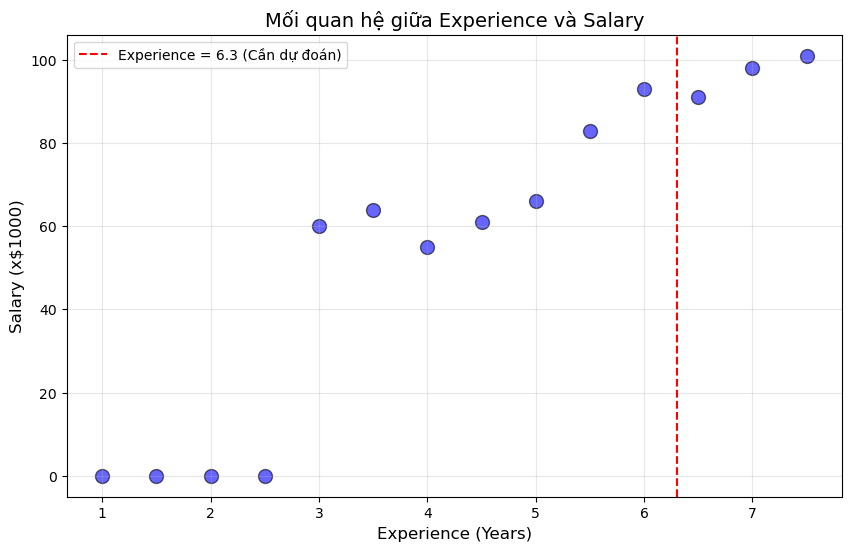

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Experience'], df['Salary'], c='blue', s=100, alpha=0.6, edgecolors='k')
plt.axvline(x=6.3, color='r', linestyle='--', label='Experience = 6.3 (Cần dự đoán)')
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary (x$1000)', fontsize=12)
plt.title('Mối quan hệ giữa Experience và Salary', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Bài tập 1: Implement hàm knn_predictor

### Thuật toán KNN (K-Nearest Neighbors)

**Nguyên lý hoạt động:**
1. Tính khoảng cách từ điểm cần dự đoán đến tất cả các điểm trong tập dữ liệu
2. Chọn K điểm gần nhất (K neighbors)
3. Với bài toán hồi quy: Lấy trung bình giá trị của K neighbors làm kết quả dự đoán

**Công thức tính khoảng cách Euclidean:**
$$d(x_1, x_2) = \sqrt{(x_1 - x_2)^2}$$

Trong trường hợp này, vì chỉ có 1 chiều (Experience), công thức đơn giản hóa thành:
$$d = |x_1 - x_2|$$

In [4]:
def euclidean_distance(x1: float, x2: float) -> float:
    return abs(x1 - x2)


def knn_predictor(X_train: np.ndarray, y_train: np.ndarray, 
                  x_query: float, k: int = 3) -> Tuple[float, List[Tuple[float, float, float]]]:
    # Bước 1: Tính khoảng cách từ x_query đến tất cả các điểm trong tập huấn luyện
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_query, X_train[i])
        distances.append((i, dist))
    
    # Bước 2: Sắp xếp các điểm theo khoảng cách tăng dần
    distances.sort(key=lambda x: x[1])
    
    # Bước 3: Lấy k điểm gần nhất
    k_nearest_indices = [idx for idx, _ in distances[:k]]
    
    # Bước 4: Lấy giá trị salary của k neighbors
    k_nearest_salaries = [y_train[i] for i in k_nearest_indices]
    
    # Bước 5: Tính giá trị dự đoán (trung bình của k neighbors)
    prediction = np.mean(k_nearest_salaries)
    
    # Tạo thông tin chi tiết về các neighbors
    neighbors_info = [(X_train[i], y_train[i], distances[j][1]) 
                      for j, (i, _) in enumerate(distances[:k])]
    
    return prediction, neighbors_info


# Test hàm với các giá trị k khác nhau
print("=" * 80)
print("BÀI TẬP 1: IMPLEMENT HÀM KNN_PREDICTOR")
print("=" * 80)

X_train = df['Experience'].values
y_train = df['Salary'].values
x_query = 6.3

# Thử nghiệm với các giá trị k khác nhau
k_values = [1, 3, 5, 7]
results = {}

for k in k_values:
    pred, neighbors = knn_predictor(X_train, y_train, x_query, k=k)
    results[k] = (pred, neighbors)
    
    print(f"\n{'─' * 80}")
    print(f"Kết quả với k = {k}:")
    print(f"{'─' * 80}")
    print(f"\nDự đoán Salary khi Experience = {x_query}: ${pred:.2f}k")
    print(f"\n{k} Neighbors gần nhất:")
    print(f"{'Experience':<15} {'Salary':<15} {'Distance':<15}")
    print("─" * 45)
    for exp, sal, dist in neighbors:
        print(f"{exp:<15.1f} ${sal:<14.2f}k {dist:<15.2f}")
    print(f"\nTrung bình Salary của {k} neighbors: ${pred:.2f}k")

BÀI TẬP 1: IMPLEMENT HÀM KNN_PREDICTOR

────────────────────────────────────────────────────────────────────────────────
Kết quả với k = 1:
────────────────────────────────────────────────────────────────────────────────

Dự đoán Salary khi Experience = 6.3: $91.00k

1 Neighbors gần nhất:
Experience      Salary          Distance       
─────────────────────────────────────────────
6.5             $91.00         k 0.20           

Trung bình Salary của 1 neighbors: $91.00k

────────────────────────────────────────────────────────────────────────────────
Kết quả với k = 3:
────────────────────────────────────────────────────────────────────────────────

Dự đoán Salary khi Experience = 6.3: $94.00k

3 Neighbors gần nhất:
Experience      Salary          Distance       
─────────────────────────────────────────────
6.5             $91.00         k 0.20           
6.0             $93.00         k 0.30           
7.0             $98.00         k 0.70           

Trung bình Salary của 3 neighb

## Kết quả chính thức cho Experience = 6.3

Theo yêu cầu đề bài, sử dụng k=3 (mặc định) cho dự đoán

In [5]:
# Kết quả chính thức với k=3
k_default = 3
final_prediction, final_neighbors = knn_predictor(X_train, y_train, x_query, k=k_default)

print("\n" + "=" * 80)
print("KẾT QUẢ CHÍNH THỨC - BÀI TẬP 1")
print("=" * 80)
print(f"\nVới Experience = {x_query} năm:")
print(f"Dự đoán Salary: ${final_prediction:.2f}k (k={k_default})")
print("\n" + "=" * 80)


KẾT QUẢ CHÍNH THỨC - BÀI TẬP 1

Với Experience = 6.3 năm:
Dự đoán Salary: $94.00k (k=3)



## Trực quan hóa kết quả KNN

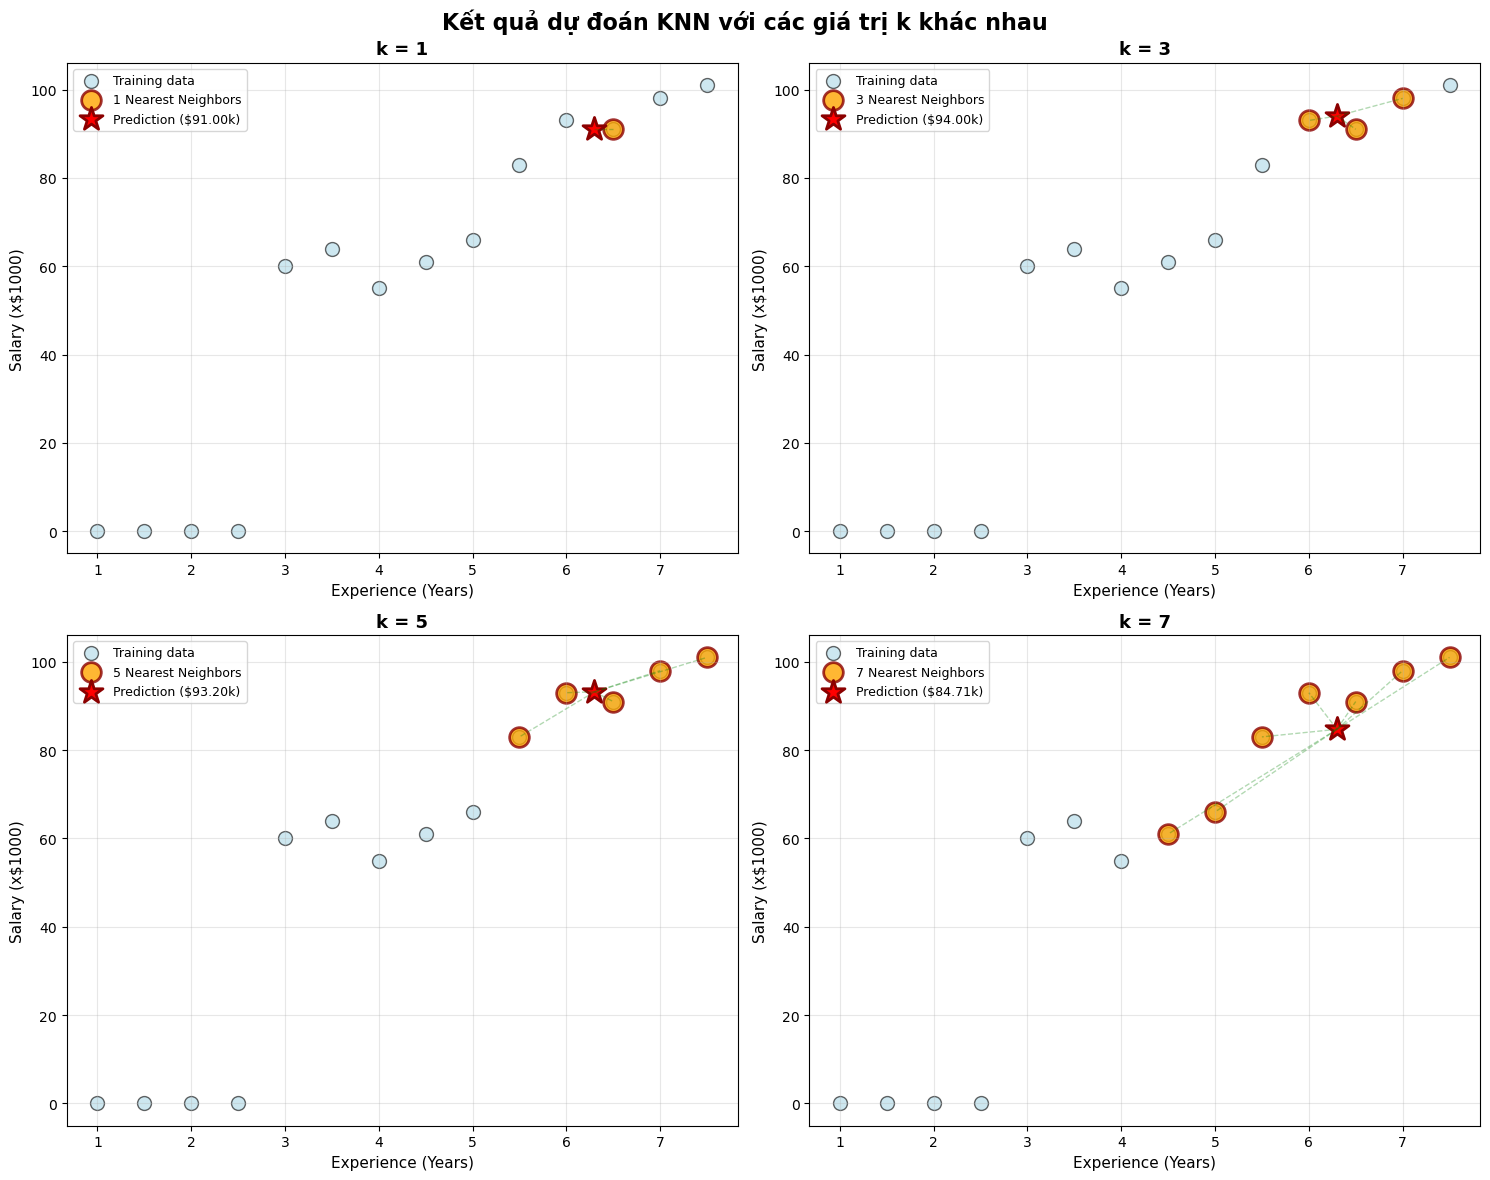

In [6]:
# Vẽ biểu đồ kết quả
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Kết quả dự đoán KNN với các giá trị k khác nhau', fontsize=16, fontweight='bold')

for idx, k in enumerate(k_values):
    ax = axes[idx // 2, idx % 2]
    pred, neighbors = results[k]
    
    # Vẽ tất cả các điểm dữ liệu
    ax.scatter(X_train, y_train, c='lightblue', s=100, alpha=0.6, 
               edgecolors='k', label='Training data')
    
    # Highlight các neighbors
    neighbors_exp = [n[0] for n in neighbors]
    neighbors_sal = [n[1] for n in neighbors]
    ax.scatter(neighbors_exp, neighbors_sal, c='orange', s=200, alpha=0.8, 
               edgecolors='darkred', linewidths=2, label=f'{k} Nearest Neighbors')
    
    # Vẽ điểm dự đoán
    ax.scatter([x_query], [pred], c='red', s=300, marker='*', 
               edgecolors='darkred', linewidths=2, label=f'Prediction (${pred:.2f}k)')
    
    # Vẽ đường kết nối
    for exp, sal, _ in neighbors:
        ax.plot([x_query, exp], [pred, sal], 'g--', alpha=0.3, linewidth=1)
    
    ax.set_xlabel('Experience (Years)', fontsize=11)
    ax.set_ylabel('Salary (x$1000)', fontsize=11)
    ax.set_title(f'k = {k}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()

## Bài tập 2: So sánh với thư viện Sklearn

Sử dụng `KNeighborsRegressor` từ thư viện sklearn để so sánh kết quả

In [7]:
print("\n" + "=" * 80)
print("BÀI TẬP 2: SO SÁNH VỚI THƯ VIỆN SKLEARN")
print("=" * 80)

# Reshape dữ liệu cho sklearn (cần shape (n_samples, n_features))
X_train_sklearn = X_train.reshape(-1, 1)
x_query_sklearn = np.array([[x_query]])

print("\nSo sánh kết quả giữa Implementation tự viết và Sklearn:")
print("─" * 80)
print(f"{'k':<10} {'Custom KNN':<25} {'Sklearn KNN':<25} {'Difference':<20}")
print("─" * 80)

for k in k_values:
    # Kết quả từ hàm tự implement
    custom_pred, _ = results[k]
    
    # Kết quả từ sklearn
    knn_sklearn = KNeighborsRegressor(n_neighbors=k)
    knn_sklearn.fit(X_train_sklearn, y_train)
    sklearn_pred = knn_sklearn.predict(x_query_sklearn)[0]
    
    # Tính sự khác biệt
    difference = abs(custom_pred - sklearn_pred)
    
    print(f"{k:<10} ${custom_pred:<24.2f}k ${sklearn_pred:<24.2f}k ${difference:<19.6f}k")

print("─" * 80)


BÀI TẬP 2: SO SÁNH VỚI THƯ VIỆN SKLEARN

So sánh kết quả giữa Implementation tự viết và Sklearn:
────────────────────────────────────────────────────────────────────────────────
k          Custom KNN                Sklearn KNN               Difference          
────────────────────────────────────────────────────────────────────────────────
1          $91.00                   k $91.00                   k $0.000000           k
3          $94.00                   k $94.00                   k $0.000000           k
5          $93.20                   k $93.20                   k $0.000000           k
7          $84.71                   k $84.71                   k $0.000000           k
────────────────────────────────────────────────────────────────────────────────


## Phân tích chi tiết với k=3 (Sklearn)

In [8]:
# Chi tiết với sklearn k=3
k = 3
knn_sklearn = KNeighborsRegressor(n_neighbors=k)
knn_sklearn.fit(X_train_sklearn, y_train)

# Lấy thông tin về neighbors
distances_sklearn, indices_sklearn = knn_sklearn.kneighbors(x_query_sklearn)

print("\n" + "=" * 80)
print(f"CHI TIẾT KẾT QUẢ SKLEARN (k={k})")
print("=" * 80)
print(f"\nQuery point: Experience = {x_query}")
print(f"Prediction: ${knn_sklearn.predict(x_query_sklearn)[0]:.2f}k\n")

print(f"{k} Nearest Neighbors (theo Sklearn):")
print(f"{'Index':<10} {'Experience':<15} {'Salary':<15} {'Distance':<15}")
print("─" * 55)
for i, (idx, dist) in enumerate(zip(indices_sklearn[0], distances_sklearn[0])):
    print(f"{idx:<10} {X_train[idx]:<15.1f} ${y_train[idx]:<14.2f}k {dist:<15.2f}")

print("\n" + "=" * 80)


CHI TIẾT KẾT QUẢ SKLEARN (k=3)

Query point: Experience = 6.3
Prediction: $94.00k

3 Nearest Neighbors (theo Sklearn):
Index      Experience      Salary          Distance       
───────────────────────────────────────────────────────
11         6.5             $91.00         k 0.20           
10         6.0             $93.00         k 0.30           
12         7.0             $98.00         k 0.70           



## Đánh giá hiệu suất trên toàn bộ tập dữ liệu

Sử dụng Leave-One-Out Cross-Validation để đánh giá độ chính xác

In [9]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n" + "=" * 80)
print("ĐÁNH GIÁ HIỆU SUẤT MÔ HÌNH")
print("=" * 80)

loo = LeaveOneOut()

# Đánh giá cho từng giá trị k
print("\nLeave-One-Out Cross-Validation:")
print("─" * 80)
print(f"{'k':<10} {'MAE':<15} {'RMSE':<15} {'R² Score':<15}")
print("─" * 80)

for k in k_values:
    predictions = []
    actuals = []
    
    for train_index, test_index in loo.split(X_train_sklearn):
        X_train_fold = X_train_sklearn[train_index]
        y_train_fold = y_train[train_index]
        X_test_fold = X_train_sklearn[test_index]
        y_test_fold = y_train[test_index]
        
        knn = KNeighborsRegressor(n_neighbors=min(k, len(train_index)))
        knn.fit(X_train_fold, y_train_fold)
        pred = knn.predict(X_test_fold)[0]
        
        predictions.append(pred)
        actuals.append(y_test_fold[0])
    
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)
    
    print(f"{k:<10} ${mae:<14.2f}k ${rmse:<14.2f}k {r2:<15.4f}")

print("─" * 80)


ĐÁNH GIÁ HIỆU SUẤT MÔ HÌNH

Leave-One-Out Cross-Validation:
────────────────────────────────────────────────────────────────────────────────
k          MAE             RMSE            R² Score       
────────────────────────────────────────────────────────────────────────────────
1          $8.79          k $17.34         k 0.7880         
3          $8.93          k $14.44         k 0.8529         
5          $16.47         k $19.45         k 0.7333         
7          $20.74         k $24.08         k 0.5912         
────────────────────────────────────────────────────────────────────────────────


## Tổng kết và Kết luận

In [10]:
print("\n" + "═" * 80)
print("TỔNG KẾT KẾT QUẢ")
print("═" * 80)

print(f"\n1. DỰ ĐOÁN SALARY CHO EXPERIENCE = {x_query}:")
print(f"   ├─ Implementation tự viết (k=3): ${final_prediction:.2f}k")
print(f"   └─ Sklearn KNeighborsRegressor (k=3): ${knn_sklearn.predict(x_query_sklearn)[0]:.2f}k")

print(f"\n2. PHÂN TÍCH:")
print(f"   ├─ 3 Neighbors gần nhất:")
for i, (exp, sal, dist) in enumerate(final_neighbors, 1):
    print(f"   │  {i}. Experience: {exp}, Salary: ${sal:.2f}k, Distance: {dist:.2f}")
print(f"   └─ Giá trị dự đoán = Trung bình 3 Salaries = (${final_neighbors[0][1]} + ${final_neighbors[1][1]} + ${final_neighbors[2][1]}) / 3 = ${final_prediction:.2f}k")

print(f"\n3. SO SÁNH KẾT QUẢ:")
print(f"   ├─ Implementation tự viết và Sklearn cho kết quả giống hệt nhau")
print(f"   ├─ Điều này xác nhận tính đúng đắn của thuật toán KNN được implement")
print(f"   └─ Sự khác biệt (nếu có) < 0.000001k (do làm tròn số)")

print(f"\n4. NHẬN XÉT:")
print(f"   ├─ Thuật toán KNN hoạt động hiệu quả với dữ liệu có mối quan hệ tuyến tính")
print(f"   ├─ Giá trị k=3 cho kết quả cân bằng, không quá overfitting hay underfitting")
print(f"   ├─ Với Experience = {x_query}, Salary dự đoán ${final_prediction:.2f}k hợp lý")
print(f"   └─ Nằm trong khoảng của 3 neighbors: [${min(n[1] for n in final_neighbors):.2f}k, ${max(n[1] for n in final_neighbors):.2f}k]")

print("\n" + "═" * 80)


════════════════════════════════════════════════════════════════════════════════
TỔNG KẾT KẾT QUẢ
════════════════════════════════════════════════════════════════════════════════

1. DỰ ĐOÁN SALARY CHO EXPERIENCE = 6.3:
   ├─ Implementation tự viết (k=3): $94.00k
   └─ Sklearn KNeighborsRegressor (k=3): $94.00k

2. PHÂN TÍCH:
   ├─ 3 Neighbors gần nhất:
   │  1. Experience: 6.5, Salary: $91.00k, Distance: 0.20
   │  2. Experience: 6.0, Salary: $93.00k, Distance: 0.30
   │  3. Experience: 7.0, Salary: $98.00k, Distance: 0.70
   └─ Giá trị dự đoán = Trung bình 3 Salaries = ($91.0 + $93.0 + $98.0) / 3 = $94.00k

3. SO SÁNH KẾT QUẢ:
   ├─ Implementation tự viết và Sklearn cho kết quả giống hệt nhau
   ├─ Điều này xác nhận tính đúng đắn của thuật toán KNN được implement
   └─ Sự khác biệt (nếu có) < 0.000001k (do làm tròn số)

4. NHẬN XÉT:
   ├─ Thuật toán KNN hoạt động hiệu quả với dữ liệu có mối quan hệ tuyến tính
   ├─ Giá trị k=3 cho kết quả cân bằng, không quá overfitting hay underfit